# Train the Agent if Necessary

Run the cell below to train the agent, or skip it to just used the saved model weights. If you train the agent, you will have to restart the kernel afterward because of https://github.com/Unity-Technologies/ml-agents/issues/1167

The trainer uses standard DQN with a 64 x 64 x 4 dense network with ReLu activations. The hyperparameters are set as follows:

* BUFFER_SIZE = int(1e5)  # replay buffer size
* BATCH_SIZE = 64  # minibatch size
* GAMMA = 0.99  # discount factor
* TAU = 1e-3  # for soft update of target parameters
* LR = 5e-4  # learning rate
* UPDATE_EVERY = 4  # how often to update the network


In [1]:
#%run ./DqnTrainer.py

# Agent Visualization

-----
### Setup the Environment

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import DqnTrainer
import torch
import pickle

Using GPU :-)


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [3]:
env = UnityEnvironment(file_name="Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state_size = len(state)


### Load the Saved Model and Visualize the Agent

#### Plot the training scores

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


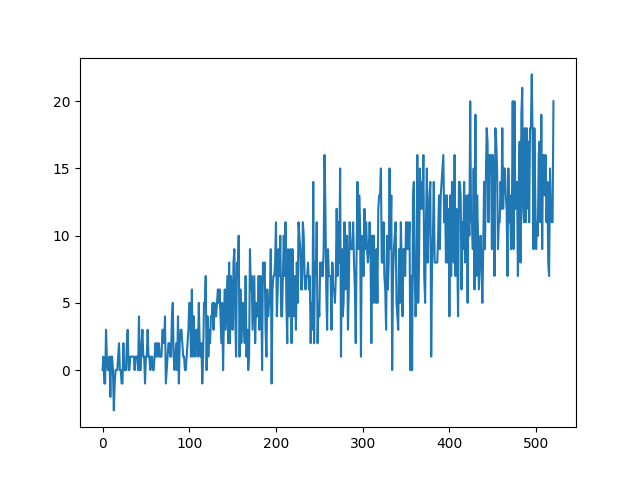

In [6]:
scores = pickle.load(open("banana_scores.pkl", "rb"))
plt.plot(scores)

#### Visualize the agent's policy

In [7]:
agent = DqnTrainer.Agent(state_size=state_size, action_size=action_size, seed=42)
agent.qnetwork_local.load_state_dict(torch.load("banana.torch"))

In [8]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 9.0


When finished, you can close the environment.

In [9]:
env.close()

### Future work

Future work could include using double DQN, dueling DQN, and/or prioritized experience replay.